In [52]:
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector, Operator
import numpy as np
import matplotlib.pyplot as plt
from QuditsOnQubits import create_ame43, create_graph_ghz, create_ghz

In [73]:
import igraph as ig

In [18]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('CZ.qpy', 'rb') as fd:
    CZgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

In [24]:
qc = QuantumCircuit(4)
qc.append(Fgate, [0, 1])
qc.append(Fgate, [2, 3])
qc.append(CZgate, [0, 1, 2, 3])
#qc.append(FDAGgate, [0, 1])

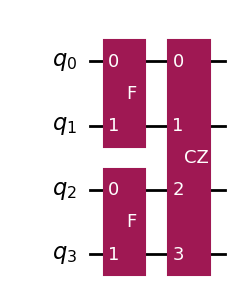

In [25]:
qc.draw('mpl')

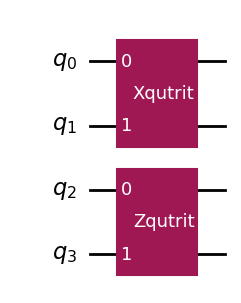

In [41]:
stabqc = QuantumCircuit(4)
stabqc.append(Xgate, [0, 1])
stabqc.append(Zgate, [2, 3])
stabqc.draw('mpl')

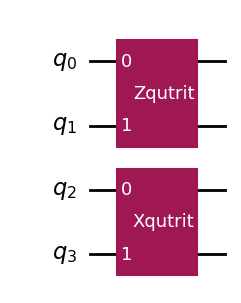

In [37]:
stabqc2 = QuantumCircuit(4)
stabqc2.append(Zgate, [0, 1])
stabqc2.append(Xgate, [2, 3])
stabqc2.draw('mpl')

In [28]:
stateqc = Statevector(qc)
stateqc.draw('latex')

<IPython.core.display.Latex object>

In [34]:
stateqc.expectation_value(Operator(stabqc)).round(3)

np.complex128(1-0j)

In [38]:
stateqc.expectation_value(Operator(stabqc2)).round(3)

np.complex128(1-0j)

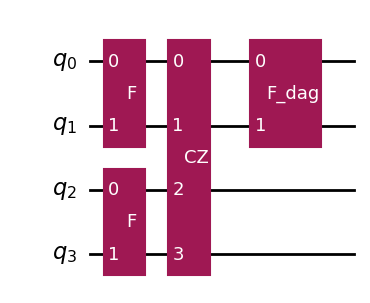

In [30]:
qc_with_DAG = QuantumCircuit(4)
qc_with_DAG.append(Fgate, [0, 1])
qc_with_DAG.append(Fgate, [2, 3])
qc_with_DAG.append(CZgate, [0, 1, 2, 3])
qc_with_DAG.append(FDAGgate, [0, 1])
qc_with_DAG.draw('mpl')

In [31]:
qc_with_DAG_state = Statevector(qc_with_DAG)
qc_with_DAG_state.draw('latex')

<IPython.core.display.Latex object>

In [33]:
qc_with_DAG_state.expectation_value(Operator(stabqc)).round(3)

np.complex128(-0j)

In [39]:
qc_with_DAG_state.expectation_value(Operator(stabqc2)).round(3)

np.complex128(-0-0j)

Przy zmianie bazy, czyli dodaniu Fdag tak zeby wyszedl ladny wektor w bazie 0, 1. Nie dzialaja stabilizatory w podstawowej formie X i Z

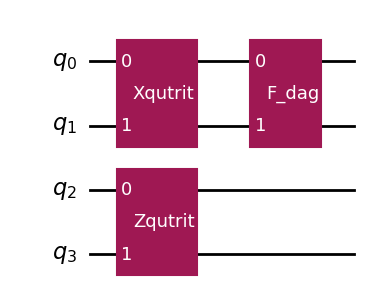

In [50]:
stabqcDAG = QuantumCircuit(4)
stabqcDAG.append(Xgate, [0, 1])
stabqcDAG.append(Zgate, [2, 3])
stabqcDAG.append(FDAGgate, [0, 1])
#stabqcDAG.append(Fgate, [2, 3])
stabqcDAG.draw('mpl')

In [51]:
qc_with_DAG_state.expectation_value(Operator(stabqcDAG)).round(3)

np.complex128(-0.333j)

Sprawdzanie dla ghz bez zmiany bazy tylko czysto z algorytmu (F na kazdym wezle i CZ na polaczeniach)

In [58]:
ghz_qc = create_ghz()
ghz_qc = ghz_qc[0]

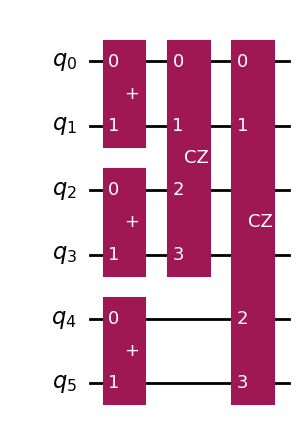

In [59]:
ghz_qc.draw('mpl')

In [61]:
state_ghz = Statevector(ghz_qc)
state_ghz.draw('latex')

<IPython.core.display.Latex object>

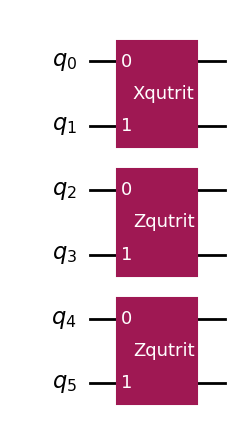

In [63]:
stab_ghz1 = QuantumCircuit(6)
stab_ghz1.append(Xgate, [0, 1])
stab_ghz1.append(Zgate, [2, 3])
stab_ghz1.append(Zgate, [4, 5])
stab_ghz1.draw('mpl')

In [65]:
state_ghz.expectation_value(Operator(stab_ghz1)).round(3)

np.complex128(1-0j)

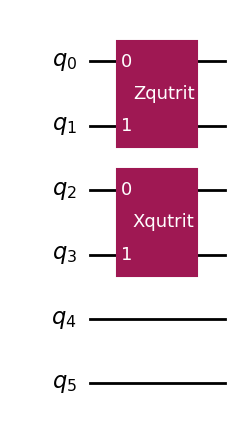

In [67]:
stab_ghz2 = QuantumCircuit(6)
stab_ghz2.append(Zgate, [0, 1])
stab_ghz2.append(Xgate, [2, 3])
stab_ghz2.draw('mpl')

In [68]:
state_ghz.expectation_value(Operator(stab_ghz2)).round(3)

np.complex128(1-0j)

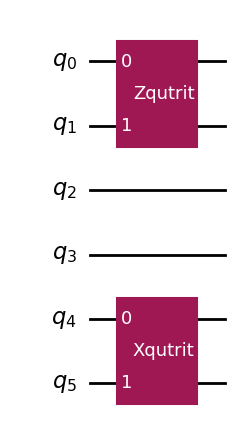

In [69]:
stab_ghz3 = QuantumCircuit(6)
stab_ghz3.append(Zgate, [0, 1])
stab_ghz3.append(Xgate, [4, 5])
stab_ghz3.draw('mpl')

In [70]:
state_ghz.expectation_value(Operator(stab_ghz3)).round(3)

np.complex128(1-0j)

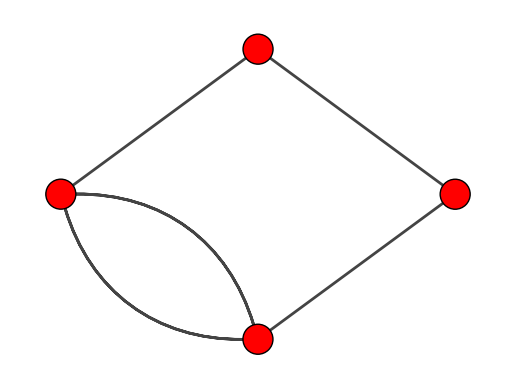

In [75]:
sq = ig.Graph()
sq.add_vertices(4)
sq.add_edges([(0, 1), (1, 2), (2, 3), (2, 3), (3, 0)])

fig, ax = plt.subplots()
ig.plot(sq, target=ax)

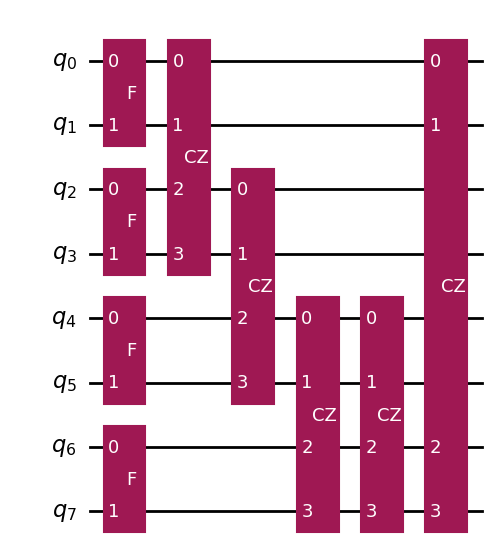

In [76]:
ame43_qc = create_graph_ghz(sq)
ame43_qc.draw('mpl')

In [78]:
ame43_state = Statevector(ame43_qc)
ame43_state.draw('latex')

<IPython.core.display.Latex object>

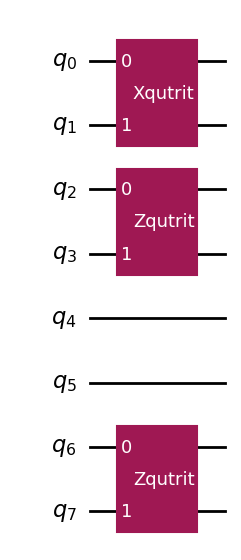

In [79]:
stab_ame43_1 = QuantumCircuit(8)
stab_ame43_1.append(Xgate, [0, 1])
stab_ame43_1.append(Zgate, [2, 3])
stab_ame43_1.append(Zgate, [6, 7])
stab_ame43_1.draw('mpl')

In [80]:
ame43_state.expectation_value(Operator(stab_ame43_1)).round(3)

np.complex128(1-0j)

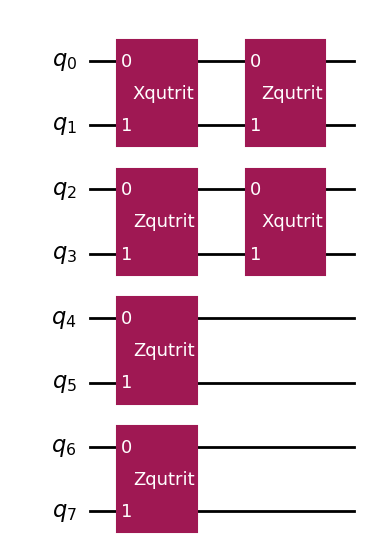

In [81]:
stab_ame43_2 = QuantumCircuit(8)
stab_ame43_2.append(Xgate, [0, 1])
stab_ame43_2.append(Zgate, [0, 1])
stab_ame43_2.append(Zgate, [2, 3])
stab_ame43_2.append(Xgate, [2, 3])
stab_ame43_2.append(Zgate, [4, 5])
stab_ame43_2.append(Zgate, [6, 7])
stab_ame43_2.draw('mpl')

In [82]:
ame43_state.expectation_value(Operator(stab_ame43_2)).round(3)

np.complex128(1-0j)

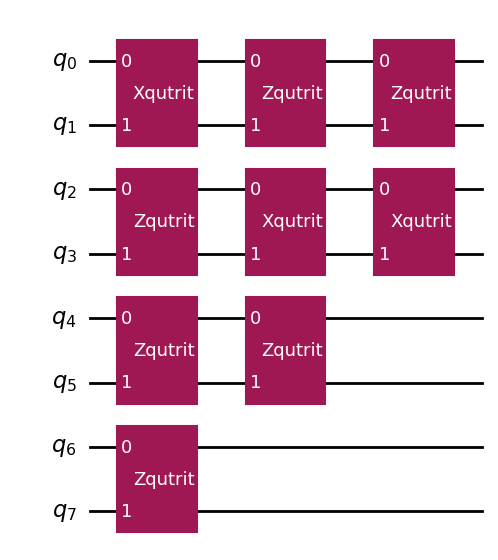

In [83]:
stab_ame43_3 = QuantumCircuit(8)
stab_ame43_3.append(Xgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [6, 7])
stab_ame43_3.draw('mpl')

In [84]:
ame43_state.expectation_value(Operator(stab_ame43_3)).round(3)

np.complex128(1-0j)

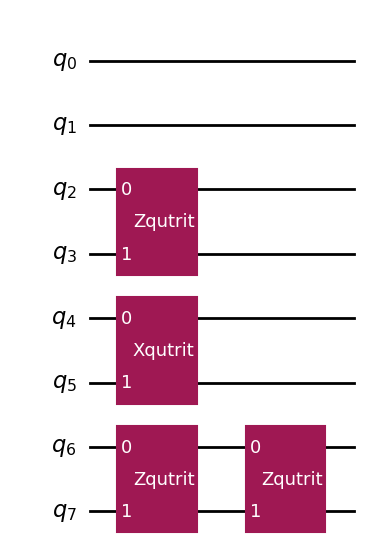

In [85]:
stab_ame43_4 = QuantumCircuit(8)
stab_ame43_4.append(Zgate, [2, 3])
stab_ame43_4.append(Xgate, [4, 5])
stab_ame43_4.append(Zgate, [6, 7])
stab_ame43_4.append(Zgate, [6, 7])
stab_ame43_4.draw('mpl')

In [86]:
ame43_state.expectation_value(Operator(stab_ame43_4)).round(3)

np.complex128(1-0j)

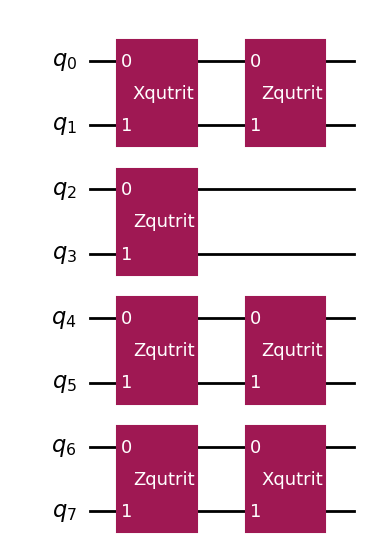

In [87]:
stab_ame43_5 = QuantumCircuit(8)
stab_ame43_5.append(Xgate, [0, 1])
stab_ame43_5.append(Zgate, [0, 1])
stab_ame43_5.append(Zgate, [2, 3])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [6, 7])
stab_ame43_5.append(Xgate, [6, 7])
stab_ame43_5.draw('mpl')

In [88]:
ame43_state.expectation_value(Operator(stab_ame43_5)).round(3)

np.complex128(1-0j)